# Parental Leave Project
## Part II - Cleaning and Aggregating Data

Now that I have a bunch of csv files, I will load them into pandas data frames and try to put them into a standard format so I can start to make some plots and explore relationships. 

The first question I want to address is - what is the relationship (if any) between length of maternity leave and women's employment rates. 

In [21]:
import numpy as np 
import pandas as pd 

from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

I first want to generate a plot comparing length of maternity leave to the employment rate of women. I'll start out by combining the maternity leave data from the Parental Leave wikipedia page and the employment data from OECD. 

In [22]:
ParentalLeave_0 = pd.read_csv('./Parental Leave By Country/Parental Leave By Country.csv')
ParentalLeave_1 = pd.read_csv('./Parental Leave By Country/Parental Leave By Country_1.csv')
ParentalLeave_2 = pd.read_csv('./Parental Leave By Country/Parental Leave By Country_2.csv')
ParentalLeave_3 = pd.read_csv('./Parental Leave By Country/Parental Leave By Country_3.csv')
ParentalLeave_4 = pd.read_csv('./Parental Leave By Country/Parental Leave By Country_4.csv')

I'll first combine these tables into a single dataframe with two columns: Country and Maternity Leave (weeks). I will revisit these tables later to use some of the more detailed information such as the % of pay during maternity leave, parental leave, and source of payment. I'll leave out ParentalLeave_4, because it only contans information about the UN parental leave policy. 

First, I will use pandas .info() to get some information about the tables.

In [23]:
ParentalLeave_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Country                                       52 non-null object
Maternity leave (weeks)                       52 non-null int64
Maternity leave (% of pay)                    52 non-null object
Paternity leave (weeks)                       51 non-null object
Paternity leave (% of pay)                    28 non-null object
Parental leave [For EITHER parent] (weeks)    51 non-null object
Parental leave (% of pay)                     5 non-null object
Source of payment                             52 non-null object
dtypes: int64(1), object(7)
memory usage: 3.3+ KB


In [24]:
ParentalLeave_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
Country                                       37 non-null object
Maternity leave (weeks)                       37 non-null object
Maternity leave (% of pay)                    36 non-null object
Paternity leave (weeks)                       35 non-null object
Paternity leave (% of pay)                    16 non-null object
Parental leave [For EITHER parent] (weeks)    34 non-null object
Parental leave (% of pay)                     5 non-null object
Source of payment                             36 non-null object
dtypes: object(8)
memory usage: 2.4+ KB


In [25]:
ParentalLeave_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
Country                   41 non-null object
Paid maternity leave      41 non-null object
Paid paternity leave      16 non-null object
Unpaid maternity leave    8 non-null object
Unpaid paternity leave    4 non-null object
Restrictions              7 non-null object
dtypes: object(6)
memory usage: 2.0+ KB


In [26]:
ParentalLeave_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Country                                       52 non-null object
Maternity leave (weeks)                       52 non-null object
Maternity leave (% of pay)                    52 non-null object
Paternity leave (weeks)                       46 non-null object
Paternity leave (% of pay)                    28 non-null object
Parental leave [For EITHER parent] (weeks)    47 non-null object
Parental leave (% of pay)                     43 non-null object
Source of payment                             50 non-null object
dtypes: object(8)
memory usage: 3.3+ KB


For our purposes, at the moment, ParentalLeave 0, 1, and 3 are pretty uniform - I'll want to pick out the columns named Country and Maternity leave (weeks). 
ParentalLeave_2 is formatted slightly differently - there is a column for Paid maternity leave and Unpaid maternity leave, and the entries are not purely numeric - let's look a little more closely at a few examples:

In [27]:
ParentalLeave_2.head(5)

,Country,Paid maternity leave,Paid paternity leave,Unpaid maternity leave,Unpaid paternity leave,Restrictions
0,Afghanistan,90 days 100%,NaN,NaN,NaN,NaN
1,Azerbaijan,126 days 100%,NaN,NaN,NaN,NaN
2,Australia,18 weeks at National Minimum Wage (currently A...,2 weeks at National Minimum Wage,Up to 52 weeks unpaid shared between the parents,Up to 3 weeks of unpaid leave,The 52 weeks are shared between the parents an...
3,Bahrain,60 days 100%,NaN,NaN,NaN,NaN
4,Bangladesh,16 weeks (8 weeks before delivery and 8 weeks ...,NaN,"In case of third (+) time mother, who has two ...",NaN,NaN


The first difficulty will be dealing with the split of the Paid and Unpaid maternity leave columns. It looks like many countries have NaN for Unpaid maternity leave, so I will pick out the ones with an entry for Unpaid maternity leave:

In [28]:
ParentalLeave_2.loc[~ParentalLeave_2['Unpaid maternity leave'].isnull()]

,Country,Paid maternity leave,Paid paternity leave,Unpaid maternity leave,Unpaid paternity leave,Restrictions
2,Australia,18 weeks at National Minimum Wage (currently A...,2 weeks at National Minimum Wage,Up to 52 weeks unpaid shared between the parents,Up to 3 weeks of unpaid leave,The 52 weeks are shared between the parents an...
4,Bangladesh,16 weeks (8 weeks before delivery and 8 weeks ...,NaN,"In case of third (+) time mother, who has two ...",NaN,NaN
13,Israel,"14 weeks 100%, with an additional 12 weeks unp...",Can take the paid leave instead of the mother ...,1 year,NaN,NaN
14,Japan,14 weeks 60%,NaN,1 year,1 year,"When parents take turns, the total period may ..."
25,New Zealand,"18 weeks, 100% or NZ$516.85 per week (whicheve...","None, plus any share from mother",52 weeks (including paid leave). Can be shared...,"2 weeks, plus any share from mother",If the mother is ordered to start leave early ...
28,Papua New Guinea,0 days,NaN,12 weeks,NaN,NaN
34,Sri Lanka,"12 weeks 100% (84 working days), 84 days 50%",03 days 100%,84 days,NaN,NaN
38,United Arab Emirates,45 Days 100%,NaN,55 days (total 100 days maternity leave),NaN,Maternity leave at 100% pay is subject to the ...


In [29]:
ParentalLeave_2.loc[~ParentalLeave_2['Unpaid maternity leave'].isnull()].Country.count()

8

Since there are only 8 countries with an entry in the Unpaid maternity leave column, I will handle these manually. 
The next issue to deal with is the non-uniformity of the Paid maternity column. The length of time is listed in weeks, days, or years. I wrote this function to convert the entries in this column into weeks:

In [30]:
def clean_paid_maternity_leave(string_input):
    count = -1
    num_weeks = []
    input_list = string_input.split(' ')
    for item in input_list:
        count = count+1
        if (item == 'days') & (num_weeks==[]):
            #I assume a 5 day work week in converting the number of days into weeks
            num_weeks = float(input_list[count-1])/5 
        elif (item == 'weeks') & (num_weeks==[]):
            num_weeks = float(input_list[count-1])
        elif (item == 'months') & (num_weeks==[]):
            num_weeks = float(input_list[count-1])*4
    return num_weeks

When I first applied this function to the Paid maternity leave column in ParentalLeave_2, I got an error, because Vietnam has an entry that says: '4-6 months 100%'. Since I don't know the actual value, I will drop this row. 

In [31]:
ParentalLeave_2.drop([39], inplace=True)

Using Pandas .apply function, I apply the my function elementwise to the Paid maternity leave column, only including the rows without an entry in the Unpaid maternity leave column. I assign the output to a new row in the dataframe called "Maternity leave (weeks)"

In [32]:
rows_to_clean = ParentalLeave_2['Unpaid maternity leave'].isnull()

ParentalLeave_2['Maternity leave (weeks)'] = \
    ParentalLeave_2.loc[rows_to_clean]['Paid maternity leave'].apply(clean_paid_maternity_leave)

Now I'll check to see if what I just did worked:

In [33]:
ParentalLeave_2.head(5)

,Country,Paid maternity leave,Paid paternity leave,Unpaid maternity leave,Unpaid paternity leave,Restrictions,Maternity leave (weeks)
0,Afghanistan,90 days 100%,NaN,NaN,NaN,NaN,18.0
1,Azerbaijan,126 days 100%,NaN,NaN,NaN,NaN,25.2
2,Australia,18 weeks at National Minimum Wage (currently A...,2 weeks at National Minimum Wage,Up to 52 weeks unpaid shared between the parents,Up to 3 weeks of unpaid leave,The 52 weeks are shared between the parents an...,NaN
3,Bahrain,60 days 100%,NaN,NaN,NaN,NaN,12.0
4,Bangladesh,16 weeks (8 weeks before delivery and 8 weeks ...,NaN,"In case of third (+) time mother, who has two ...",NaN,NaN,NaN


Looks good so far! I still need to manually enter a number of weeks for the countries with Paid and Unpaid matenity leave:

In [34]:
# Australia has "up to 52 weeks unpaid shared between parents"
ParentalLeave_2.loc[2,'Maternity leave (weeks)']=52.0

#Bangladesh has 16 weeks paid for the first two children, and then unpaid for babies 3 and up
ParentalLeave_2.loc[4,'Maternity leave (weeks)']=18.0

#Israel has 14 weeks paid and an additional 12 weeks unpaid
ParentalLeave_2.loc[13,'Maternity leave (weeks)']=26.0

#Japan has 14 weeks at 60% pay and then up to a year unpaid
ParentalLeave_2.loc[14,'Maternity leave (weeks)']=52.0

#New Zealand has 52 weeks of combined paid and unpaid leave
ParentalLeave_2.loc[25,'Maternity leave (weeks)']=52.0

#Papua New Guinea has 0 weeks paid and 12 weeks unpaid
ParentalLeave_2.loc[28,'Maternity leave (weeks)']=12.0

#Sri Lanka has 14 weeks partially paid, and then 7 more weeks unpaid
ParentalLeave_2.loc[34,'Maternity leave (weeks)']=21.0

#United Arab Emirates has a total of 100 days, or 20 weeks, split between paid and unpaid maternity leave
ParentalLeave_2.loc[38,'Maternity leave (weeks)']=18.0

In [35]:
ParentalLeave_2.head(5)

,Country,Paid maternity leave,Paid paternity leave,Unpaid maternity leave,Unpaid paternity leave,Restrictions,Maternity leave (weeks)
0,Afghanistan,90 days 100%,NaN,NaN,NaN,NaN,18.0
1,Azerbaijan,126 days 100%,NaN,NaN,NaN,NaN,25.2
2,Australia,18 weeks at National Minimum Wage (currently A...,2 weeks at National Minimum Wage,Up to 52 weeks unpaid shared between the parents,Up to 3 weeks of unpaid leave,The 52 weeks are shared between the parents an...,52.0
3,Bahrain,60 days 100%,NaN,NaN,NaN,NaN,12.0
4,Bangladesh,16 weeks (8 weeks before delivery and 8 weeks ...,NaN,"In case of third (+) time mother, who has two ...",NaN,NaN,18.0


In [36]:
ParentalLeave_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 40
Data columns (total 7 columns):
Country                    40 non-null object
Paid maternity leave       40 non-null object
Paid paternity leave       16 non-null object
Unpaid maternity leave     8 non-null object
Unpaid paternity leave     4 non-null object
Restrictions               7 non-null object
Maternity leave (weeks)    40 non-null float64
dtypes: float64(1), object(6)
memory usage: 3.8+ KB


Perfect! Now I have 40 countries, and 40 entries for Maternity leave(weeks) in the ParentalLeave_2 table. 

Now the last thing to do before combining all the data is to double check the other tables and make sure all of them have numerial values entered in the Maternity leave (weeks) column. 

In [37]:
ParentalLeave_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Country                                       52 non-null object
Maternity leave (weeks)                       52 non-null int64
Maternity leave (% of pay)                    52 non-null object
Paternity leave (weeks)                       51 non-null object
Paternity leave (% of pay)                    28 non-null object
Parental leave [For EITHER parent] (weeks)    51 non-null object
Parental leave (% of pay)                     5 non-null object
Source of payment                             52 non-null object
dtypes: int64(1), object(7)
memory usage: 3.3+ KB


In [38]:
ParentalLeave_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
Country                                       37 non-null object
Maternity leave (weeks)                       37 non-null object
Maternity leave (% of pay)                    36 non-null object
Paternity leave (weeks)                       35 non-null object
Paternity leave (% of pay)                    16 non-null object
Parental leave [For EITHER parent] (weeks)    34 non-null object
Parental leave (% of pay)                     5 non-null object
Source of payment                             36 non-null object
dtypes: object(8)
memory usage: 2.4+ KB


In [39]:
ParentalLeave_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Country                                       52 non-null object
Maternity leave (weeks)                       52 non-null object
Maternity leave (% of pay)                    52 non-null object
Paternity leave (weeks)                       46 non-null object
Paternity leave (% of pay)                    28 non-null object
Parental leave [For EITHER parent] (weeks)    47 non-null object
Parental leave (% of pay)                     43 non-null object
Source of payment                             50 non-null object
dtypes: object(8)
memory usage: 3.3+ KB


It looks like ParentalLeave_1 and 3 have some non-numeric entries for 'Maternity leave (weeks)' column. Let's pick out the troublesome lines and see what's going on:

In [40]:
ParentalLeave_1.loc[pd.to_numeric(ParentalLeave_1['Maternity leave (weeks)'],errors='coerce').isnull()]

,Country,Maternity leave (weeks),Maternity leave (% of pay),Paternity leave (weeks),Paternity leave (% of pay),Parental leave [For EITHER parent] (weeks),Parental leave (% of pay),Source of payment
9,Canada (Québec),Option 1: 18 Option 2: 15,Option 1: 70% (up to maximum $975 per week) Op...,Option 1: 5 Option 2: 3,Option 1: 70% (up to maximum $975 per week) Op...,Option 1: 32 Option 2: 25,Option 1: 7 weeks at 70% (up to maximum $975 p...,Social security


For ParentalLeave_1, the only non-numeric entry is Canada (Quebec) which has two options with different levels of pay. Since I am not differentiating between Paid and Unpaid maternity for this initial analysis, I will replace it with 18, the higher number. 

In [41]:
ParentalLeave_1.loc[9,'Maternity leave (weeks)']=18.0

ParentalLeave_1.loc[:,'Maternity leave (weeks)']=pd.to_numeric(ParentalLeave_1['Maternity leave (weeks)'])

Now ParentalLeave_3:

In [42]:
ParentalLeave_3.loc[pd.to_numeric(ParentalLeave_3['Maternity leave (weeks)'],errors='coerce').isnull()]

,Country,Maternity leave (weeks),Maternity leave (% of pay),Paternity leave (weeks),Paternity leave (% of pay),Parental leave [For EITHER parent] (weeks),Parental leave (% of pay),Source of payment
35,Norway,35 (or 45),100% for 25 weeks or 80% for 45 weeks,0-10 (depending on the mother's tax contributi...,100% or 80%,36 or 46 (10 for mothers; 10 for fathers; 26 t...,100% for 46 weeks or 80% for 56 weeks (up to a...,Social security
37,Portugal,17 (or 21),100% for 17 weeks or 80% for 21,3,100%,"13 each; ""sharing bonus"" of 4 weeks if initial...",25%,Social security
38,Romania,18 (9 weeks before the anticipated date of bir...,85%,5 days (15 days if an infant care course is ta...,100%,One parent is entitled to: 104 weeks (so until...,85%,Social security
44,Sweden,68 weeks or 480 days,80% (up to a ceiling),18,80% (up to a ceiling),60,80% (up to a ceiling) for 56 weeks; flat rate ...,Social security


In [43]:
ParentalLeave_3.loc[35,'Maternity leave (weeks)']=45.0
ParentalLeave_3.loc[37,'Maternity leave (weeks)']=21.0
ParentalLeave_3.loc[38,'Maternity leave (weeks)']=18.0
ParentalLeave_3.loc[44,'Maternity leave (weeks)']=68.0

ParentalLeave_3.loc[:,'Maternity leave (weeks)']=pd.to_numeric(ParentalLeave_3['Maternity leave (weeks)'])

Now each table has a Country column and a numeric Maternity leave (weeks) column, so I can easily use pandas concat function to combine these into one dataframe.  

In [44]:
cols = ['Country','Maternity leave (weeks)']
MaternityLeave_all = \
pd.concat([ParentalLeave_0[cols], ParentalLeave_1[cols], ParentalLeave_2[cols], ParentalLeave_3[cols]])

# I will reset the index and also drop the old index:
MaternityLeave_all.reset_index(inplace=True)
MaternityLeave_all.drop('index', axis=1, inplace=True)

In [45]:
MaternityLeave_all.head()

,Country,Maternity leave (weeks)
0,Algeria,14.0
1,Angola,13.0
2,Benin,14.0
3,Botswana,12.0
4,Burkina Faso,14.0


This looks good - to get a sense of what we are dealing with, I'll look at some basic statistics and plot a histogram of the maternity leave for all the countries. 

In [46]:
MaternityLeave_all['Maternity leave (weeks)'].describe()

count    181.000000
mean      17.604420
std       11.214236
min        0.000000
25%       12.000000
50%       14.000000
75%       18.000000
max       68.000000
Name: Maternity leave (weeks), dtype: float64

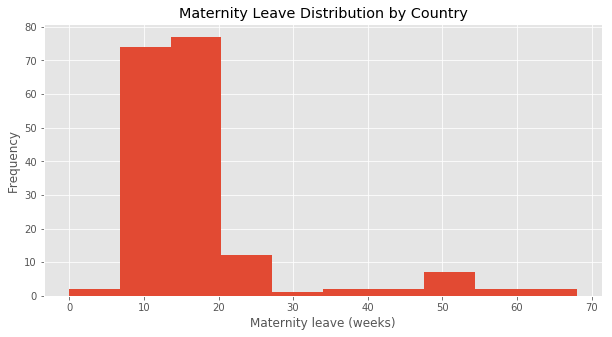

In [47]:
MaternityLeave_all['Maternity leave (weeks)'].hist(figsize=(10,5))
plt.title('Maternity Leave Distribution by Country')
plt.xlabel('Maternity leave (weeks)')
plt.ylabel('Frequency')

The distribution looks vaguely bimodal - most of the countries are grouped between 10 and 20 weeks, but there is a smaller group of countries with longer maternity leaves, centered around 50 weeks. 

Next I will clean up the employment data I got from the [OECD website](http://www.oecd.org/gender/data/). 

Note - the OECD has amassed a huge amount of data. I downloaded the Full-time equivalent employment rate, but there are many more employment measures available on their site. I chose Full-time equivalent employment rate, because I thought it was a good measure of complete engagement in the workforce. It may be interesting to further investigate other measures of employment as a future project. 

In [48]:
EmploymentRates = pd.read_csv('./Employment By Gender OECD/FullTimeEquivalentEmploymentByGender.csv')

EmploymentRates.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,PRT,Portugal,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2011,2011,PC,Percentage,0,Units,NaN,NaN,56.0,NaN,NaN
1,DNK,Denmark,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,1996,1996,PC,Percentage,0,Units,NaN,NaN,54.4,NaN,NaN
2,IRL,Ireland,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,1999,1999,PC,Percentage,0,Units,NaN,NaN,42.1,NaN,NaN
3,USA,United States,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2001,2001,PC,Percentage,0,Units,NaN,NaN,60.9,NaN,NaN
4,ITA,Italy,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2005,2005,PC,Percentage,0,Units,NaN,NaN,38.6,NaN,NaN


In [49]:
EmploymentRates.describe(include='all')

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,1370,1370,1370,1370,1370,1370,1370.0,1370,1370.000000,1370.000000,1370,1370,1370.0,1370,0.0,0.0,1370.000000,0.0,0.0
unique,39,39,1,1,2,2,NaN,1,NaN,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN
top,BEL,Netherlands,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,NaN,15-64,NaN,NaN,PC,Percentage,NaN,Units,NaN,NaN,NaN,NaN,NaN
freq,42,42,1370,1370,685,685,NaN,1370,NaN,NaN,1370,1370,NaN,1370,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2005.978102,2005.978102,NaN,NaN,0.0,NaN,NaN,NaN,63.738905,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,5.799256,5.799256,NaN,NaN,0.0,NaN,NaN,NaN,15.756483,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,1995.000000,1995.000000,NaN,NaN,0.0,NaN,NaN,NaN,24.800000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2001.000000,2001.000000,NaN,NaN,0.0,NaN,NaN,NaN,51.400000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2006.000000,2006.000000,NaN,NaN,0.0,NaN,NaN,NaN,62.500000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2011.000000,2011.000000,NaN,NaN,0.0,NaN,NaN,NaN,75.675000,NaN,NaN


Oh boy, this looks a lot less clearly organized than those nice tables from wikipedia. 

For starters, the count of Countries is 1370, but there are only 39 unique values. This means countries are repeated many times, which makes sense when you look at the other columns. 
Each row shows the employment rate for a certain country, for men or women, for a given year. There are multiple rows for countries representing the employment rates for men and women for different years. 

Lets look at only the results from 2014:

In [50]:
EmploymentRates_2014 = EmploymentRates.loc[EmploymentRates.Time==2014]
EmploymentRates_2014.describe(include='all')

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,76,76,76,76,76,76,76.0,76,76.0,76.0,76,76,76.0,76,0.0,0.0,76.000000,0.0,0.0
unique,38,38,1,1,2,2,NaN,1,NaN,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN
top,SVK,Israel,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,NaN,15-64,NaN,NaN,PC,Percentage,NaN,Units,NaN,NaN,NaN,NaN,NaN
freq,2,2,76,76,38,38,NaN,76,NaN,NaN,76,76,NaN,76,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2014.0,2014.0,NaN,NaN,0.0,NaN,NaN,NaN,63.469737,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,14.148065,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2014.0,2014.0,NaN,NaN,0.0,NaN,NaN,NaN,30.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2014.0,2014.0,NaN,NaN,0.0,NaN,NaN,NaN,53.650000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2014.0,2014.0,NaN,NaN,0.0,NaN,NaN,NaN,62.800000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,NaN,2014.0,2014.0,NaN,NaN,0.0,NaN,NaN,NaN,72.750000,NaN,NaN


This looks more reasonable. Now we have 38 unique countries, and a total count of 76. This makes sense, because each country has an entry for men and for women. 

Next, I would like to create a dataframe with three columns, Country, Men's Employment Rate, and Women's Employment Rate. 

In [51]:
EmploymentRates_2014_CLEAN = pd.DataFrame({'Country':EmploymentRates_2014.Country.unique()})
EmploymentRates_2014_CLEAN['Employment Rate (Men)']=np.nan
EmploymentRates_2014_CLEAN['Employment Rate (Women)']=np.nan

for c in EmploymentRates_2014_CLEAN.Country:

    mens_employment_rate = \
        EmploymentRates_2014.loc[((EmploymentRates_2014.Country==c)&(EmploymentRates_2014.Sex=='Men')),'Value']
    womens_employment_rate = \
        EmploymentRates_2014.loc[((EmploymentRates_2014.Country==c)&(EmploymentRates_2014.Sex=='Women')),'Value']
    
    EmploymentRates_2014_CLEAN.loc[EmploymentRates_2014_CLEAN.Country==c,'Employment Rate (Men)'] = \
        mens_employment_rate.values[0]
    EmploymentRates_2014_CLEAN.loc[EmploymentRates_2014_CLEAN.Country==c, 'Employment Rate (Women)'] = \
        womens_employment_rate.values[0]
        
EmploymentRates_2014_CLEAN.head()

,Country,Employment Rate (Men),Employment Rate (Women)
0,France,67.4,51.7
1,Hungary,68.6,54.4
2,Slovenia,68.1,57.1
3,Iceland,92.5,70.4
4,Belgium,66.9,48.0


Now I would like to combine my two dataframes, MaternityLeave_all and EmploymentRates_2014_CLEAN so that I have one master data frame with columns: Country, Maternity leave (weeks), Employment Rate (Men), and Employment Rate (Women).

This is pretty easy, using the pandas merge function:

In [52]:
MaternityLeave_vs_Employment = MaternityLeave_all.merge(EmploymentRates_2014_CLEAN, on='Country')
MaternityLeave_vs_Employment.head()

,Country,Maternity leave (weeks),Employment Rate (Men),Employment Rate (Women)
0,South Africa,17.0,55.8,38.2
1,Brazil,17.0,81.8,50.3
2,Colombia,14.0,97.4,55.3
3,Costa Rica,17.0,89.6,44.1
4,Mexico,12.0,89.4,42.1


Now that I have all of the information organized in this way, it is very easy to make a scatter plot of Employment Rates vs Maternity Leave. 

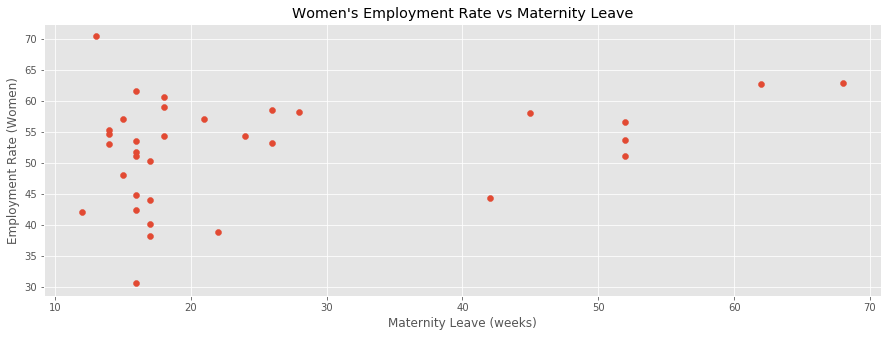

In [53]:
x = MaternityLeave_vs_Employment['Maternity leave (weeks)']
y = MaternityLeave_vs_Employment['Employment Rate (Women)']

plt.figure(figsize=(15,5))
plt.scatter(x,y)

plt.title('Women\'s Employment Rate vs Maternity Leave')
plt.xlabel('Maternity Leave (weeks)')
plt.ylabel('Employment Rate (Women)')

Surprise! Some of the countries with the highest employment rates also have the longest maternity leaves. Perhaps this has more to do with the overall strength of the economy. 

I'd like to plot Men's employment rates vs Maternity Leave to see if there is the same sort of pattern. 

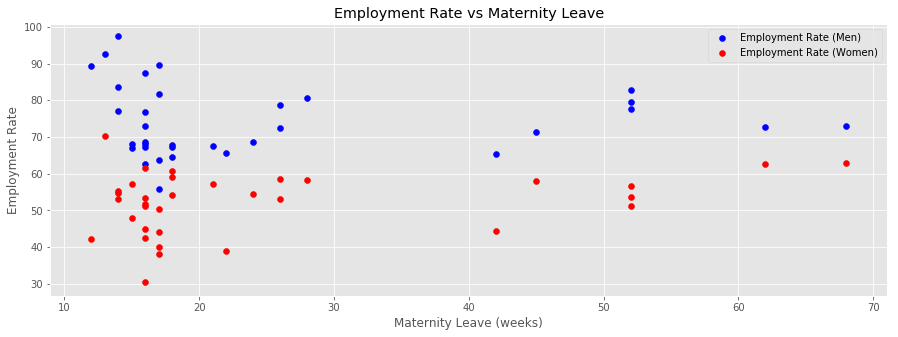

In [54]:
x = MaternityLeave_vs_Employment['Maternity leave (weeks)']
y1 = MaternityLeave_vs_Employment['Employment Rate (Men)']
y2 = MaternityLeave_vs_Employment['Employment Rate (Women)']

plt.figure(figsize=(15,5))
plt.scatter(x,y1, color='blue')

plt.scatter(x,y2, color='red')

plt.title('Employment Rate vs Maternity Leave')
plt.xlabel('Maternity Leave (weeks)')
plt.ylabel('Employment Rate')
plt.legend()

It looks like the countries with maternity leave over 40 weeks have a very strong relationship between men's and women's employment rates - this suggests that the employment rates are more effected by the overall economy than the maternity leave policies. The countries with under 30 weeks seem to have a less strong relationship. I'll try plotting the two groups separately and labelling the datapoints with the country names so I can get a better look at what is going on. 

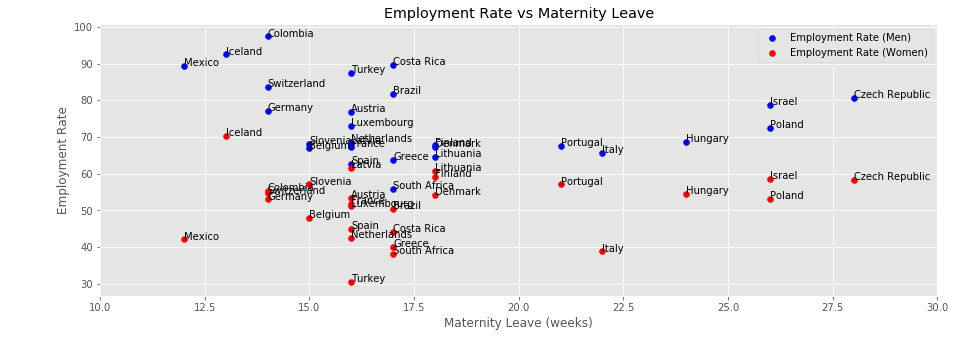

In [161]:
x = MaternityLeave_vs_Employment['Maternity leave (weeks)']
y1 = MaternityLeave_vs_Employment['Employment Rate (Men)']
y2 = MaternityLeave_vs_Employment['Employment Rate (Women)']

plt.figure(figsize=(15,5))
plt.scatter(x,y1, color='blue')

plt.scatter(x,y2, color='red')

plt.title('Employment Rate vs Maternity Leave')
plt.xlabel('Maternity Leave (weeks)')
plt.ylabel('Employment Rate')

for i,txt in enumerate(MaternityLeave_vs_Employment.Country):
    plt.annotate(txt,xy=(x[i],y1[i]))
    plt.annotate(txt,xy=(x[i],y2[i]))
    
plt.xlim([10,30])
plt.legend()

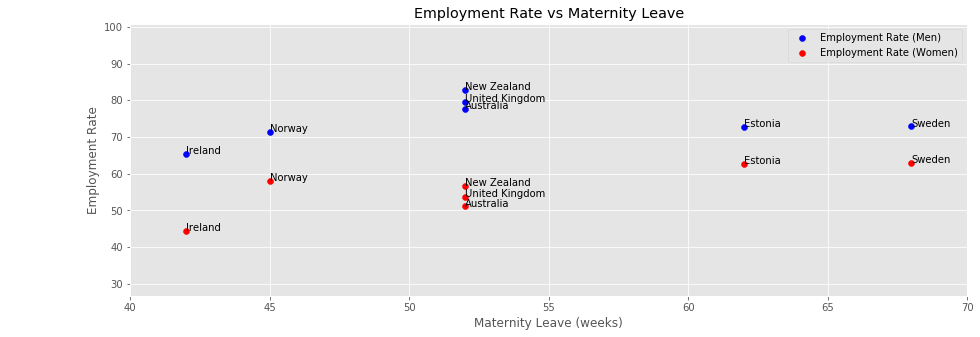

In [162]:
x = MaternityLeave_vs_Employment['Maternity leave (weeks)']
y1 = MaternityLeave_vs_Employment['Employment Rate (Men)']
y2 = MaternityLeave_vs_Employment['Employment Rate (Women)']

plt.figure(figsize=(15,5))
plt.scatter(x,y1, color='blue')

plt.scatter(x,y2, color='red')

plt.title('Employment Rate vs Maternity Leave')
plt.xlabel('Maternity Leave (weeks)')
plt.ylabel('Employment Rate')

for i,txt in enumerate(MaternityLeave_vs_Employment.Country):
    plt.annotate(txt,xy=(x[i],y1[i]))
    plt.annotate(txt,xy=(x[i],y2[i]))
    
plt.xlim([40,70])
plt.legend()

Another way to account for the overall economy of a country would be to plot the **ratio** of women's to men's employment. This is more of a measure of equal participation in the workforce. 

First I will calculate the ratio and add an extra column to my dataframe:

In [163]:
MaternityLeave_vs_Employment['Ratio of Women\'s to Men\'s Employment Rate'] = \
    MaternityLeave_vs_Employment['Employment Rate (Women)']/MaternityLeave_vs_Employment['Employment Rate (Men)']
    
MaternityLeave_vs_Employment.head()

,Country,Maternity leave (weeks),Employment Rate (Men),Employment Rate (Women),Ratio of Women's to Men's Employment Rate
0,South Africa,17.0,55.8,38.2,0.684588
1,Brazil,17.0,81.8,50.3,0.614914
2,Colombia,14.0,97.4,55.3,0.567762
3,Costa Rica,17.0,89.6,44.1,0.492188
4,Mexico,12.0,89.4,42.1,0.470917


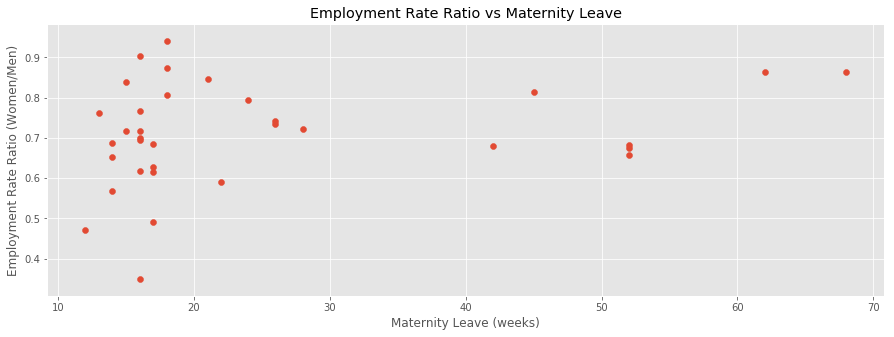

In [164]:

plt.figure(figsize=(15,5))
plt.scatter(x=MaternityLeave_vs_Employment['Maternity leave (weeks)'], \
            y=MaternityLeave_vs_Employment['Ratio of Women\'s to Men\'s Employment Rate'])

plt.title('Employment Rate Ratio vs Maternity Leave')
plt.xlabel('Maternity Leave (weeks)')
plt.ylabel('Employment Rate Ratio (Women/Men)')

Now it looks like there is a peak around 18 weeks - I'll zoom in on the section with the peak to see it a little more clearly:

(5, 35)

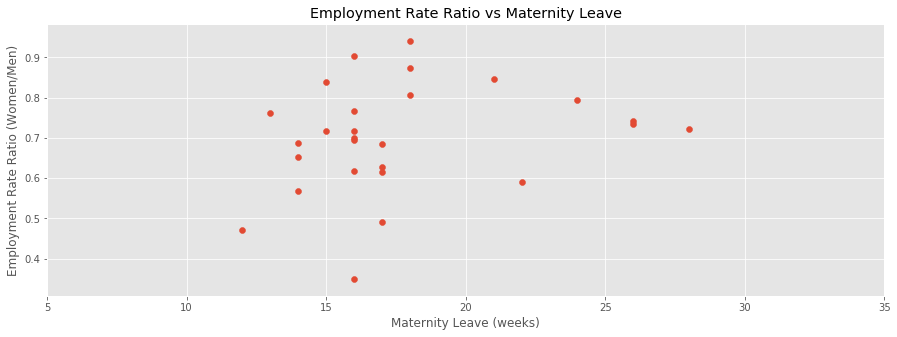

In [168]:
plt.figure(figsize=(15,5))
plt.scatter(x=MaternityLeave_vs_Employment['Maternity leave (weeks)'], \
            y=MaternityLeave_vs_Employment['Ratio of Women\'s to Men\'s Employment Rate'])

plt.title('Employment Rate Ratio vs Maternity Leave')
plt.xlabel('Maternity Leave (weeks)')
plt.ylabel('Employment Rate Ratio (Women/Men)')


plt.xlim([5,35])

So, interestingly, there seems to be some relationship between the ratio of women's to men's employment rates and the weeks of maternity leave. It looks like there is a peak in the ratio for a maternity leave length of 18 weeks. There are also some countries with very long maternity leaves that have relatively high ratios of women's to men's employment rates. 